In [82]:
import math

def get_f(a, b, c):
    return lambda x: x ** 3 + a * (x ** 2) + b * x + c


def find_root(l, r, epsilon, delta, f):
        
    if l == -float('Inf'):
        find_interval = True
        l = r - delta
        while math.copysign(1, f(l)) * math.copysign(1, f(r)) > 0:
            r-=delta
            l-=delta       
    elif r == float('Inf'):
        find_interval = True
        r = l + delta
        while math.copysign(1, f(l)) * math.copysign(1, f(r)) > 0:
            r+=delta
            l+=delta
            
    orent = False        
    if f(l) < 0:
        orent = True
    while True:
        m = (l + r) / 2
        value = f(m)
        if abs(value) < epsilon:
            return m
        else:
            if (value > epsilon) ^ orent:
                l = m
            else:
                r = m
            

def get_finder(epsilon, delta, f):
    return lambda l , r: find_root(l, r, epsilon, delta, f)


def cubic(epsilon, delta, a, b, c):
    
    roots = []
    
    f = get_f(a, b, c)
    
    find = get_finder(epsilon, delta, f)
    
    d =  a ** 2 - 3 * b
    
    if d <= 0:
        value = f(0)
        if abs(value) < epsilon:
            roots.append(0)
        elif value > epsilon:
            roots.append(find(-float('Inf'), 0.))
        else:
            roots.append(find(0, float('Inf')))
    else:
        sq_d = math.sqrt(d)
        alpha = (-a - sq_d) / 3
        beta = (-a + sq_d) / 3
        
        f_a = f(alpha)
        f_b = f(beta)
        
        if abs(f_a) < epsilon and abs(f_b) < epsilon:
            roots.append((alpha + beta) / 2)
        elif f_a > epsilon and f_b > epsilon:
            roots.append(find(-float('Inf'), alpha))
        elif f_a < -epsilon and f_b < -epsilon:
            roots.append(find(beta , float('Inf')))
        elif f_a > epsilon and f_b < -epsilon:
            roots.append(find(beta , float('Inf')))
            roots.append(find(alpha, beta))
            roots.append(find(-float('Inf'), alpha))
        elif f_a > epsilon and abs(f_b) < epsilon:
            roots.append(find(-float('Inf'), alpha))
            roots.append(beta)
        elif abs(f_a) < epsilon and f_b < -epsilon:
            roots.append(alpha)
            roots.append(find(beta, float('Inf')))
    
    return roots


In [90]:
import numpy as np
import sys
#print("Enter params (epsilon, delta, a, b, c): ")
# -4 -7 +10
#params = list(map(float, input().split()))

# x ** 3 + a * x ** 2 + b * x + c
e = 0.001
d = 0.01
a = 10
b = -2
c = -2
roots = cubic(e, d, a, b, c)

[0.5407308803290007, -0.36353669964775187, -10.177202234495592]


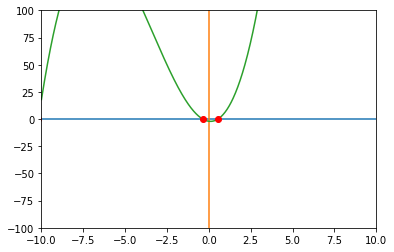

In [92]:
import matplotlib.pyplot as plt
import numpy as np

print(roots)
x = np.linspace(-10, 10, 1000)
fy = get_f(a, b, c)
y = [fy(i) for i in x]

plt.axis([-10, 10,-100, 100])
plt.plot(np.arange(-10, 11), np.zeros(21))
plt.plot(np.zeros(200), np.arange(-100, 100))

plt.plot(x, y)

# roots maximum , minimem for plot
plt.plot(roots, np.zeros(len(roots)), 'ro')
plt.show()